# Révision 6 : séries temporelles

<img src="https://cdn.pixabay.com/photo/2013/07/12/16/01/clock-150754_1280.png" alt="horloge" width="400"/>

*Source : Image par OpenClipart-Vectors de Pixabay*

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

## Analyse exploratoire des données temporelles

- **Récupérer** dans un **dataframe** Pandas les données du fichier à cette url : https://raw.githubusercontent.com/Pierre-Loic/Formation-DA-GEM-2022/main/Datasets/CAC40.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Pierre-Loic/Formation-DA-GEM-2022/main/Datasets/CAC40.csv")
df

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415
...,...,...,...,...,...,...,...,...
97643,97643,Worldline SA,2014-07-04,16.22,16.28,16.29,16.22,NaN
97644,97644,Worldline SA,2014-07-03,16.12,16.28,16.28,16.12,NaN
97645,97645,Worldline SA,2014-07-02,16.22,16.17,16.32,16.17,NaN
97646,97646,Worldline SA,2014-07-01,16.42,16.25,16.55,16.25,NaN


- Sélectionner uniquement une entreprise (colonne "Name")

In [3]:
df = df[df["Name"]=="Accor"]
df

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415
...,...,...,...,...,...,...,...,...
2594,2594,Accor,2010-01-08,24.43,24.43,24.43,24.43,NaN
2595,2595,Accor,2010-01-07,24.27,24.27,24.27,24.27,NaN
2596,2596,Accor,2010-01-06,24.66,24.66,24.66,24.66,NaN
2597,2597,Accor,2010-01-05,24.82,24.82,24.82,24.82,NaN


- Transformer l'index en **datetime**

In [4]:
df["date"] = pd.to_datetime(df["Date"])
df = df.set_index("date")
df

C:\Users\PLB\AppData\Local\Temp\ipykernel_13232\2743283503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["Date"])


,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
date,,,,,,,,
2020-04-03,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
2020-04-02,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2020-04-01,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
2020-03-31,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
2020-03-30,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415
...,...,...,...,...,...,...,...,...
2010-01-08,2594,Accor,2010-01-08,24.43,24.43,24.43,24.43,NaN
2010-01-07,2595,Accor,2010-01-07,24.27,24.27,24.27,24.27,NaN
2010-01-06,2596,Accor,2010-01-06,24.66,24.66,24.66,24.66,NaN


- Conserver uniquement la colonne du **maximum de cours de la journée**

In [5]:
df = df[['Daily_High']]
df

,Daily_High
date,
2020-04-03,23.40
2020-04-02,23.91
2020-04-01,24.10
2020-03-31,25.24
2020-03-30,26.50
...,...
2010-01-08,24.43
2010-01-07,24.27
2010-01-06,24.66


- **Trier les données** grâce à l'index

In [6]:
df = df.sort_index()
df

,Daily_High
date,
2010-01-04,24.92
2010-01-05,24.82
2010-01-06,24.66
2010-01-07,24.27
2010-01-08,24.43
...,...
2020-03-30,26.50
2020-03-31,25.24
2020-04-01,24.10


- **Ré-échantillonner** les données **par jour** et effectuer une **imputation** des données par **"ffill"**

In [7]:
df = df.resample("D").ffill()
df

,Daily_High
date,
2010-01-04,24.92
2010-01-05,24.82
2010-01-06,24.66
2010-01-07,24.27
2010-01-08,24.43
...,...
2020-03-30,26.50
2020-03-31,25.24
2020-04-01,24.10


In [8]:
df = df.fillna(method="ffill")
df.isna().sum()

Daily_High    0
dtype: int64

- Tracer 4 graphiques superposés verticalement : 
    - le graphique de la **série temporelle brute**
    - le graphique de la **série temporelle colorée par année**
    - le graphique des **moyennes mobiles (moving averages)** à 20 jours et à 50 jours
    - le graphique de la **moyenne**, **médiane**, l'**écart type**, le **minimum** et le **maximum** par mois

*Ressources :*

   - [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)

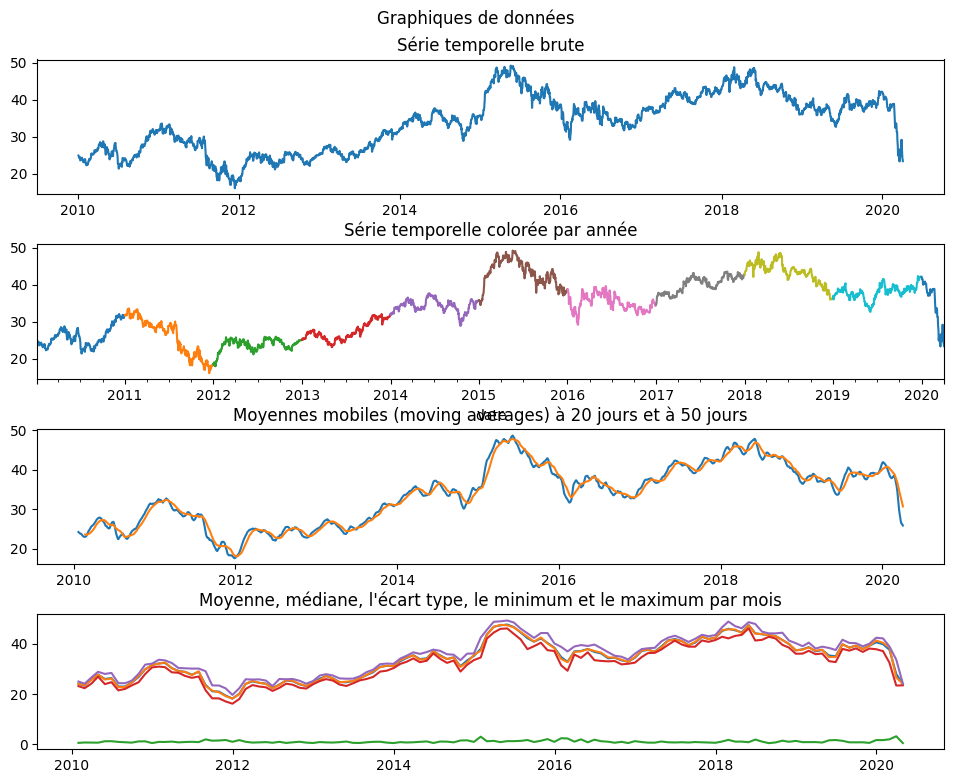

In [9]:
fig, axs = plt.subplots(4, figsize=(10, 8))
fig.suptitle("Graphiques de données")
fig.tight_layout(pad=1.5)
axs[0].plot(df)
axs[0].set_title("Série temporelle brute")
df.resample("Y").plot(ax=axs[1])
axs[1].set_title("Série temporelle colorée par année")
axs[2].plot(df.rolling(window=20).mean())
axs[2].plot(df.rolling(window=50).mean())
axs[2].set_title("Moyennes mobiles (moving averages) à 20 jours et à 50 jours")
axs[3].plot(df.resample("M").agg(["mean", "median", "std", "min", "max"]))
axs[3].set_title("Moyenne, médiane, l'écart type, le minimum et le maximum par mois")
plt.show()

- Séparer les données en un **jeu d'entrainement** et un **jeu de test** suivant l'**ordre chronologique** (20 derniers jours)

In [10]:
df_train = df.iloc[:-20]
df_test = df.iloc[-20:]

- Utiliser la fonction `auto_arima` de la bibliothèque `pmdarima` pour obtenir les meilleurs paramètres du modèle SARIMAX à entrainer

*Ressources :*

[pmdarima.arima.auto_arima](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)

In [11]:
from pmdarima import auto_arima

In [12]:
bestparam = auto_arima(df_train, start_p = 1, start_q = 1, 
           max_p = 1, max_q = 1, m = 12,
           start_P = 0, seasonal = True,
           d = None, D = 1, trace = True,
           error_action = "ignore", 
           suppres_warning = True,
           stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=17.17 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=14021.231, Time=0.36 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6518.867, Time=5.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10714.462, Time=5.59 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=14019.667, Time=0.26 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7502.488, Time=1.43 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6103.609, Time=20.99 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=59.98 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=17.15 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=14010.479, Time=11.71 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=6105.317, Time=26.80 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=10715.911, Time=18.00 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=6101.620, Time=4.77 sec
 ARIMA(1,0,0)(1,1,0)[12]             : AIC=6516.875, Time=2.38 sec
 ARIMA(1,0,0)(2,1,1)[1

- Entrainer un **modèle SARIMAX** et effectuer le graphique pour comparer les **données réelles** et les **prédictions**

Ressources : https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

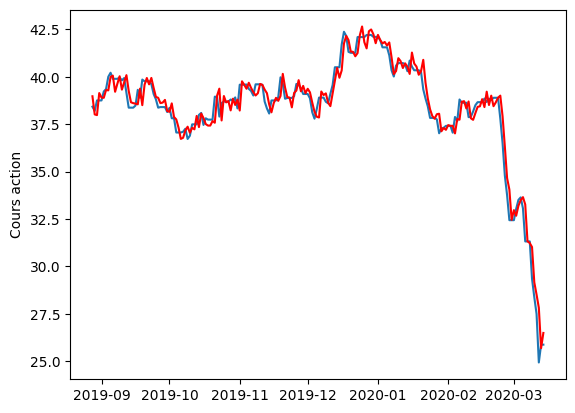

In [14]:
model = SARIMAX(df_train, order=(1,0,0), seasonal_order=(2,1,0,12))
results = model.fit()
plt.plot(df_train.iloc[-200:])
plt.plot(results.fittedvalues.iloc[-200:], color='red')
plt.ylabel("Cours action")
plt.show()

- Calculer la **MAE**, **RMSE** et la **MAPE** pour le jeu de **données d'entrainement**

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [16]:
print(f"MAE = {mean_absolute_error(df_train, results.fittedvalues)}")
print(f"RMSE = {mean_squared_error(df_train, results.fittedvalues, squared=True)}")
print(f"MAPE = {mean_absolute_percentage_error(df_train, results.fittedvalues)}")

MAE = 0.46954361871338185
RMSE = 2.207957897150781
MAPE = 0.015379760738843888


- Effectuer une **prédiction** sur **les données de test** et afficher le **graphique des données**. Calculer la **MAE**, **RMSE** et la **MAPE** pour le jeu de **données de test**

In [17]:
df_test

,Daily_High
date,
2020-03-15,25.88
2020-03-16,24.70
2020-03-17,25.43
2020-03-18,23.85
2020-03-19,23.31
2020-03-20,26.53
2020-03-21,26.53
2020-03-22,26.53
2020-03-23,24.74


In [18]:
fig = results.predict("2020-03-15", "2020-04-03")

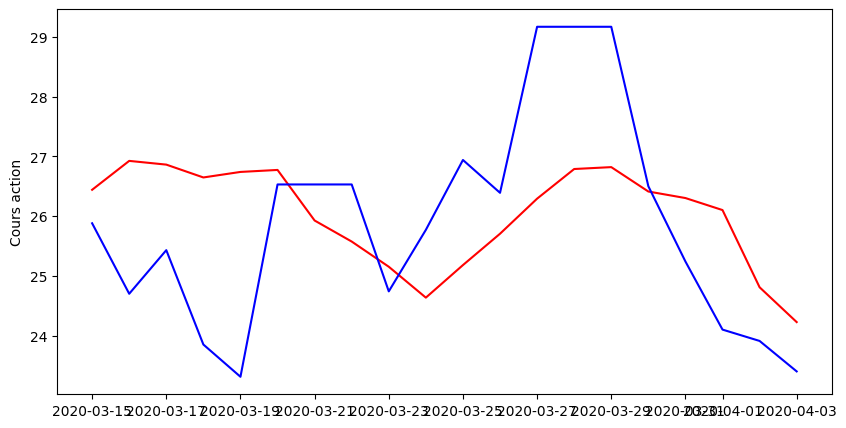

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(fig, "r")
plt.plot(df_test, "b")
plt.ylabel("Cours action")
plt.show()

In [20]:
print(f"MAE = {mean_absolute_error(df_test, fig)}")
print(f"RMSE = {mean_squared_error(df_test, fig, squared=True)}")
print(f"MAPE = {mean_absolute_percentage_error(df_test, fig)}")

MAE = 1.4362180026927867
RMSE = 2.9684008415344474
MAPE = 0.05572921727384541
